# Final Project, Part 4: Technical Notebook draft

## Analysis of training factors and 10km road race result

To begin with we will import required packages and our parsed data from Part 3.

In [3]:
# import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import numpy as np

In [4]:
# import parsed data
runners = pd.read_csv('parsed_runners.csv')

### Review our data

In [5]:
runners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 37 columns):
Unnamed: 0                28 non-null int64
AthleteID                 28 non-null int64
Gender                    28 non-null object
Age                       28 non-null int64
TrainingAge               28 non-null int64
10kmResult                28 non-null float64
ResultRating              28 non-null int64
DistanceWeek              28 non-null float64
TimeWeek                  28 non-null float64
ElevGainWeek              28 non-null float64
ElevLossWeek              28 non-null float64
Distance                  28 non-null float64
Calories                  27 non-null float64
Time                      28 non-null float64
AvgHR                     24 non-null float64
MaxHR                     24 non-null float64
AerobicTE                 26 non-null float64
AvgRunCadence             26 non-null float64
MaxRunCadence             24 non-null float64
AvgPace                   28 non-n

Good our data types are all correct

In [6]:
runners.describe()

,Unnamed: 0,AthleteID,Age,TrainingAge,10kmResult,ResultRating,DistanceWeek,TimeWeek,ElevGainWeek,ElevLossWeek,...,AgeGrade,ThresholdPace,LRDistance,LRTime,LRPace,LRIntensity,AverageIntensity,TSSWeek,CrossTrainWeek,AvgRunsWeek
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,16.000000,28.000000
mean,13.500000,14.500000,32.000000,8.821429,39.813095,4.035714,59.549965,299.376976,287.965561,241.255102,...,0.759693,4.102976,16.119552,80.137689,5.089258,0.803937,0.819495,328.626068,42.355910,5.064201
std,8.225975,8.225975,13.347215,4.216841,7.224983,0.922241,23.671144,102.118483,239.535794,148.522967,...,0.081209,0.700618,4.733783,19.442207,0.661270,0.056271,0.087936,94.673012,22.956848,0.970292
min,0.000000,1.000000,16.000000,2.000000,30.566667,2.000000,20.385833,166.799583,0.000000,0.000000,...,0.545687,3.200000,7.179091,53.719697,4.304545,0.664151,0.669506,213.438818,1.050000,3.500000
25%,6.750000,7.750000,22.000000,6.000000,35.187500,3.750000,41.367827,228.504583,157.458333,153.729167,...,0.703884,3.645833,12.915682,64.200000,4.701136,0.758896,0.757851,250.173714,29.034275,4.291667
50%,13.500000,14.500000,27.000000,7.500000,38.233333,4.000000,53.420000,281.867986,219.291667,211.583333,...,0.784268,3.950000,15.435909,75.707576,4.926136,0.821510,0.828304,300.834873,35.000000,5.083333
75%,20.250000,21.250000,43.000000,10.000000,42.250000,5.000000,72.598750,354.786875,349.687500,291.062500,...,0.807782,4.354167,19.683864,90.606439,5.354545,0.847792,0.855278,398.443758,50.312834,5.791667
max,27.000000,28.000000,55.000000,19.000000,65.116667,5.000000,113.564167,560.614457,1270.500000,705.583333,...,0.874046,6.533333,25.979091,123.246970,7.525758,0.872542,1.039126,552.545060,91.030952,7.000000


This all appears good however there is an unnamed column, which appears to have been our index, let's drop that

In [7]:
runners = runners.drop('Unnamed: 0',axis=1)

In [8]:
# Additionally let's set AthleteID as our index
runners.set_index('AthleteID')

,Gender,Age,TrainingAge,10kmResult,ResultRating,DistanceWeek,TimeWeek,ElevGainWeek,ElevLossWeek,Distance,...,AgeGrade,ThresholdPace,LRDistance,LRTime,LRPace,LRIntensity,AverageIntensity,TSSWeek,CrossTrainWeek,AvgRunsWeek
AthleteID,,,,,,,,,,,,,,,,,,,,,
1,Female,21,6,37.433333,5,84.180833,414.013889,1270.500000,0.000000,6.825473,...,0.810329,3.883333,19.806364,106.863636,5.390909,0.720349,0.801385,435.718593,34.261111,7.000000
2,Female,53,6,65.116667,3,20.385833,173.346111,90.500000,88.333333,2.496224,...,0.545687,6.533333,7.179091,53.719697,7.525758,0.868130,0.964859,251.587339,24.250000,3.500000
3,Male,20,7,31.300000,2,72.073333,312.822222,338.916667,337.750000,10.547317,...,0.853568,3.266667,17.779091,81.403030,4.562121,0.716041,0.752987,298.529724,45.833333,5.750000
4,Male,41,6,34.616667,5,113.564167,538.052500,430.750000,479.583333,7.699266,...,0.806933,3.600000,25.842727,118.474242,4.586364,0.784936,0.754326,523.148636,35.000000,6.083333
5,Female,29,15,37.716667,4,39.784167,233.135278,277.333333,275.500000,7.577937,...,0.804242,3.900000,14.295455,64.031818,4.469697,0.872542,0.837771,283.787998,91.030952,5.166667
6,Female,22,10,39.150000,4,61.570833,311.312222,218.833333,226.916667,6.056148,...,0.774798,4.050000,17.528182,89.600000,5.093939,0.795062,0.784798,336.359021,54.351667,5.583333
7,Female,55,7,51.600000,4,34.975833,214.612500,139.666667,154.916667,8.229608,...,0.706072,5.233333,11.261818,69.440909,6.165152,0.848857,0.858096,261.775830,81.704630,3.666667
8,Male,26,7,38.483333,4,52.523333,245.824167,157.750000,167.583333,5.002222,...,0.694240,3.983333,13.805455,63.322727,4.580303,0.869666,0.863229,323.557965,NaN,5.083333
9,Female,22,7,34.950000,5,71.275000,358.107500,254.500000,260.916667,6.788095,...,0.867907,3.633333,14.231818,68.677273,4.859091,0.747739,0.746221,340.316978,1.050000,5.583333


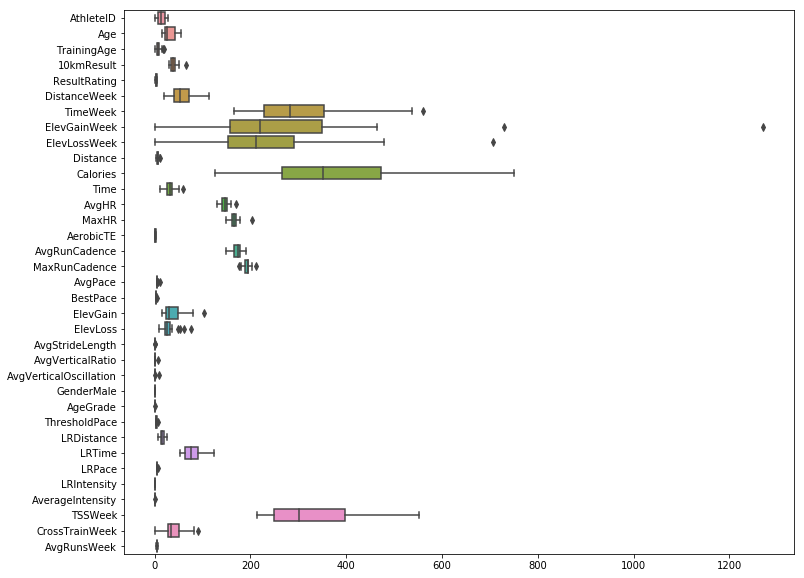

In [9]:
plt.figure(figsize=(12,10))
sns.boxplot(data=runners,orient="h")

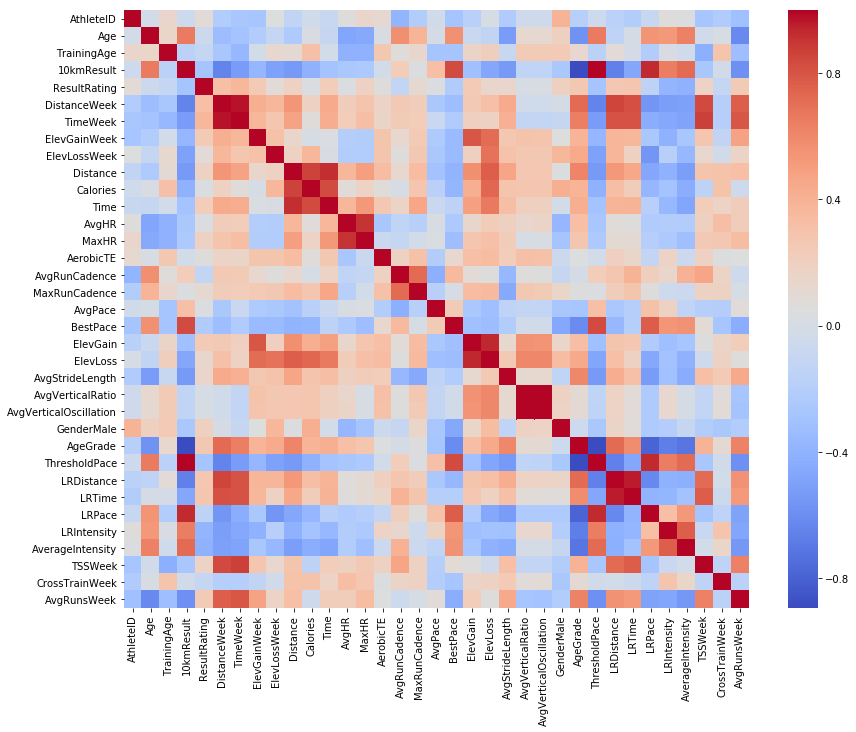

In [10]:
plt.figure(figsize=(14,11))
sns.heatmap(runners.corr(), cmap='coolwarm')

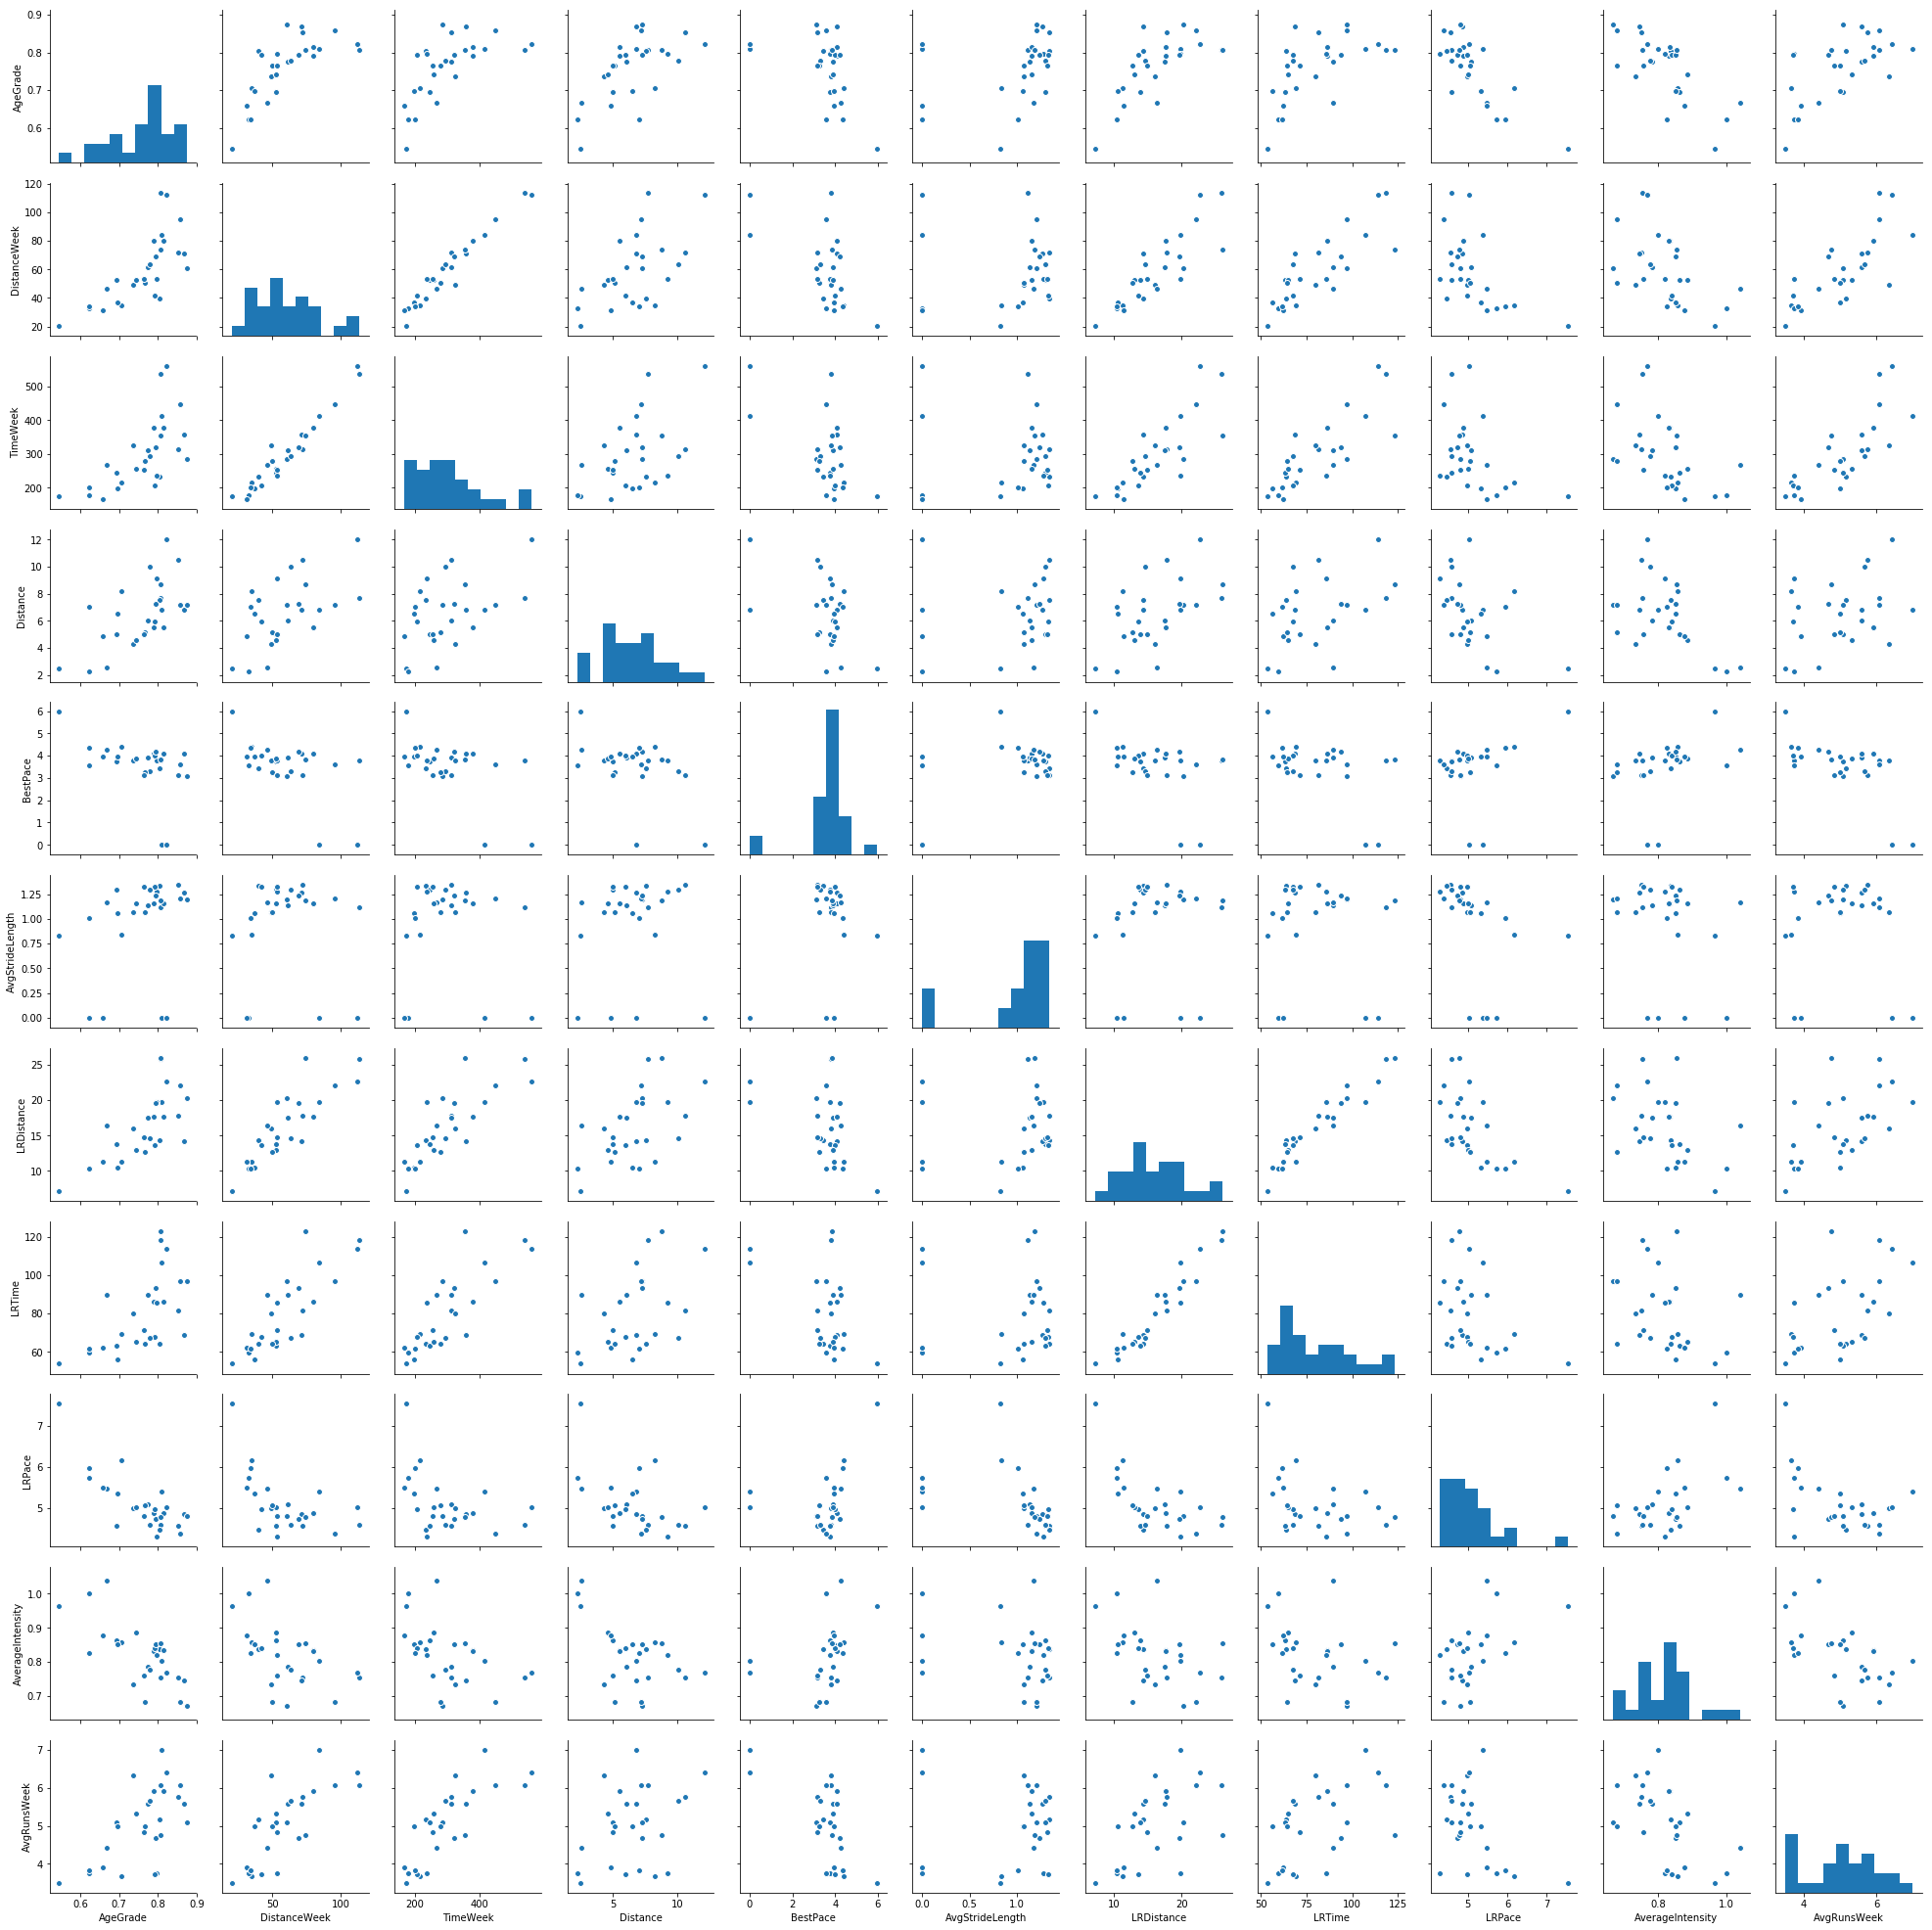

In [11]:
# Pair plot with variables most correlated with Age Grade
sns.pairplot(runners[['AgeGrade','DistanceWeek','TimeWeek','Distance','BestPace','AvgStrideLength','LRDistance','LRTime','LRPace','AverageIntensity','AvgRunsWeek']].fillna(0))

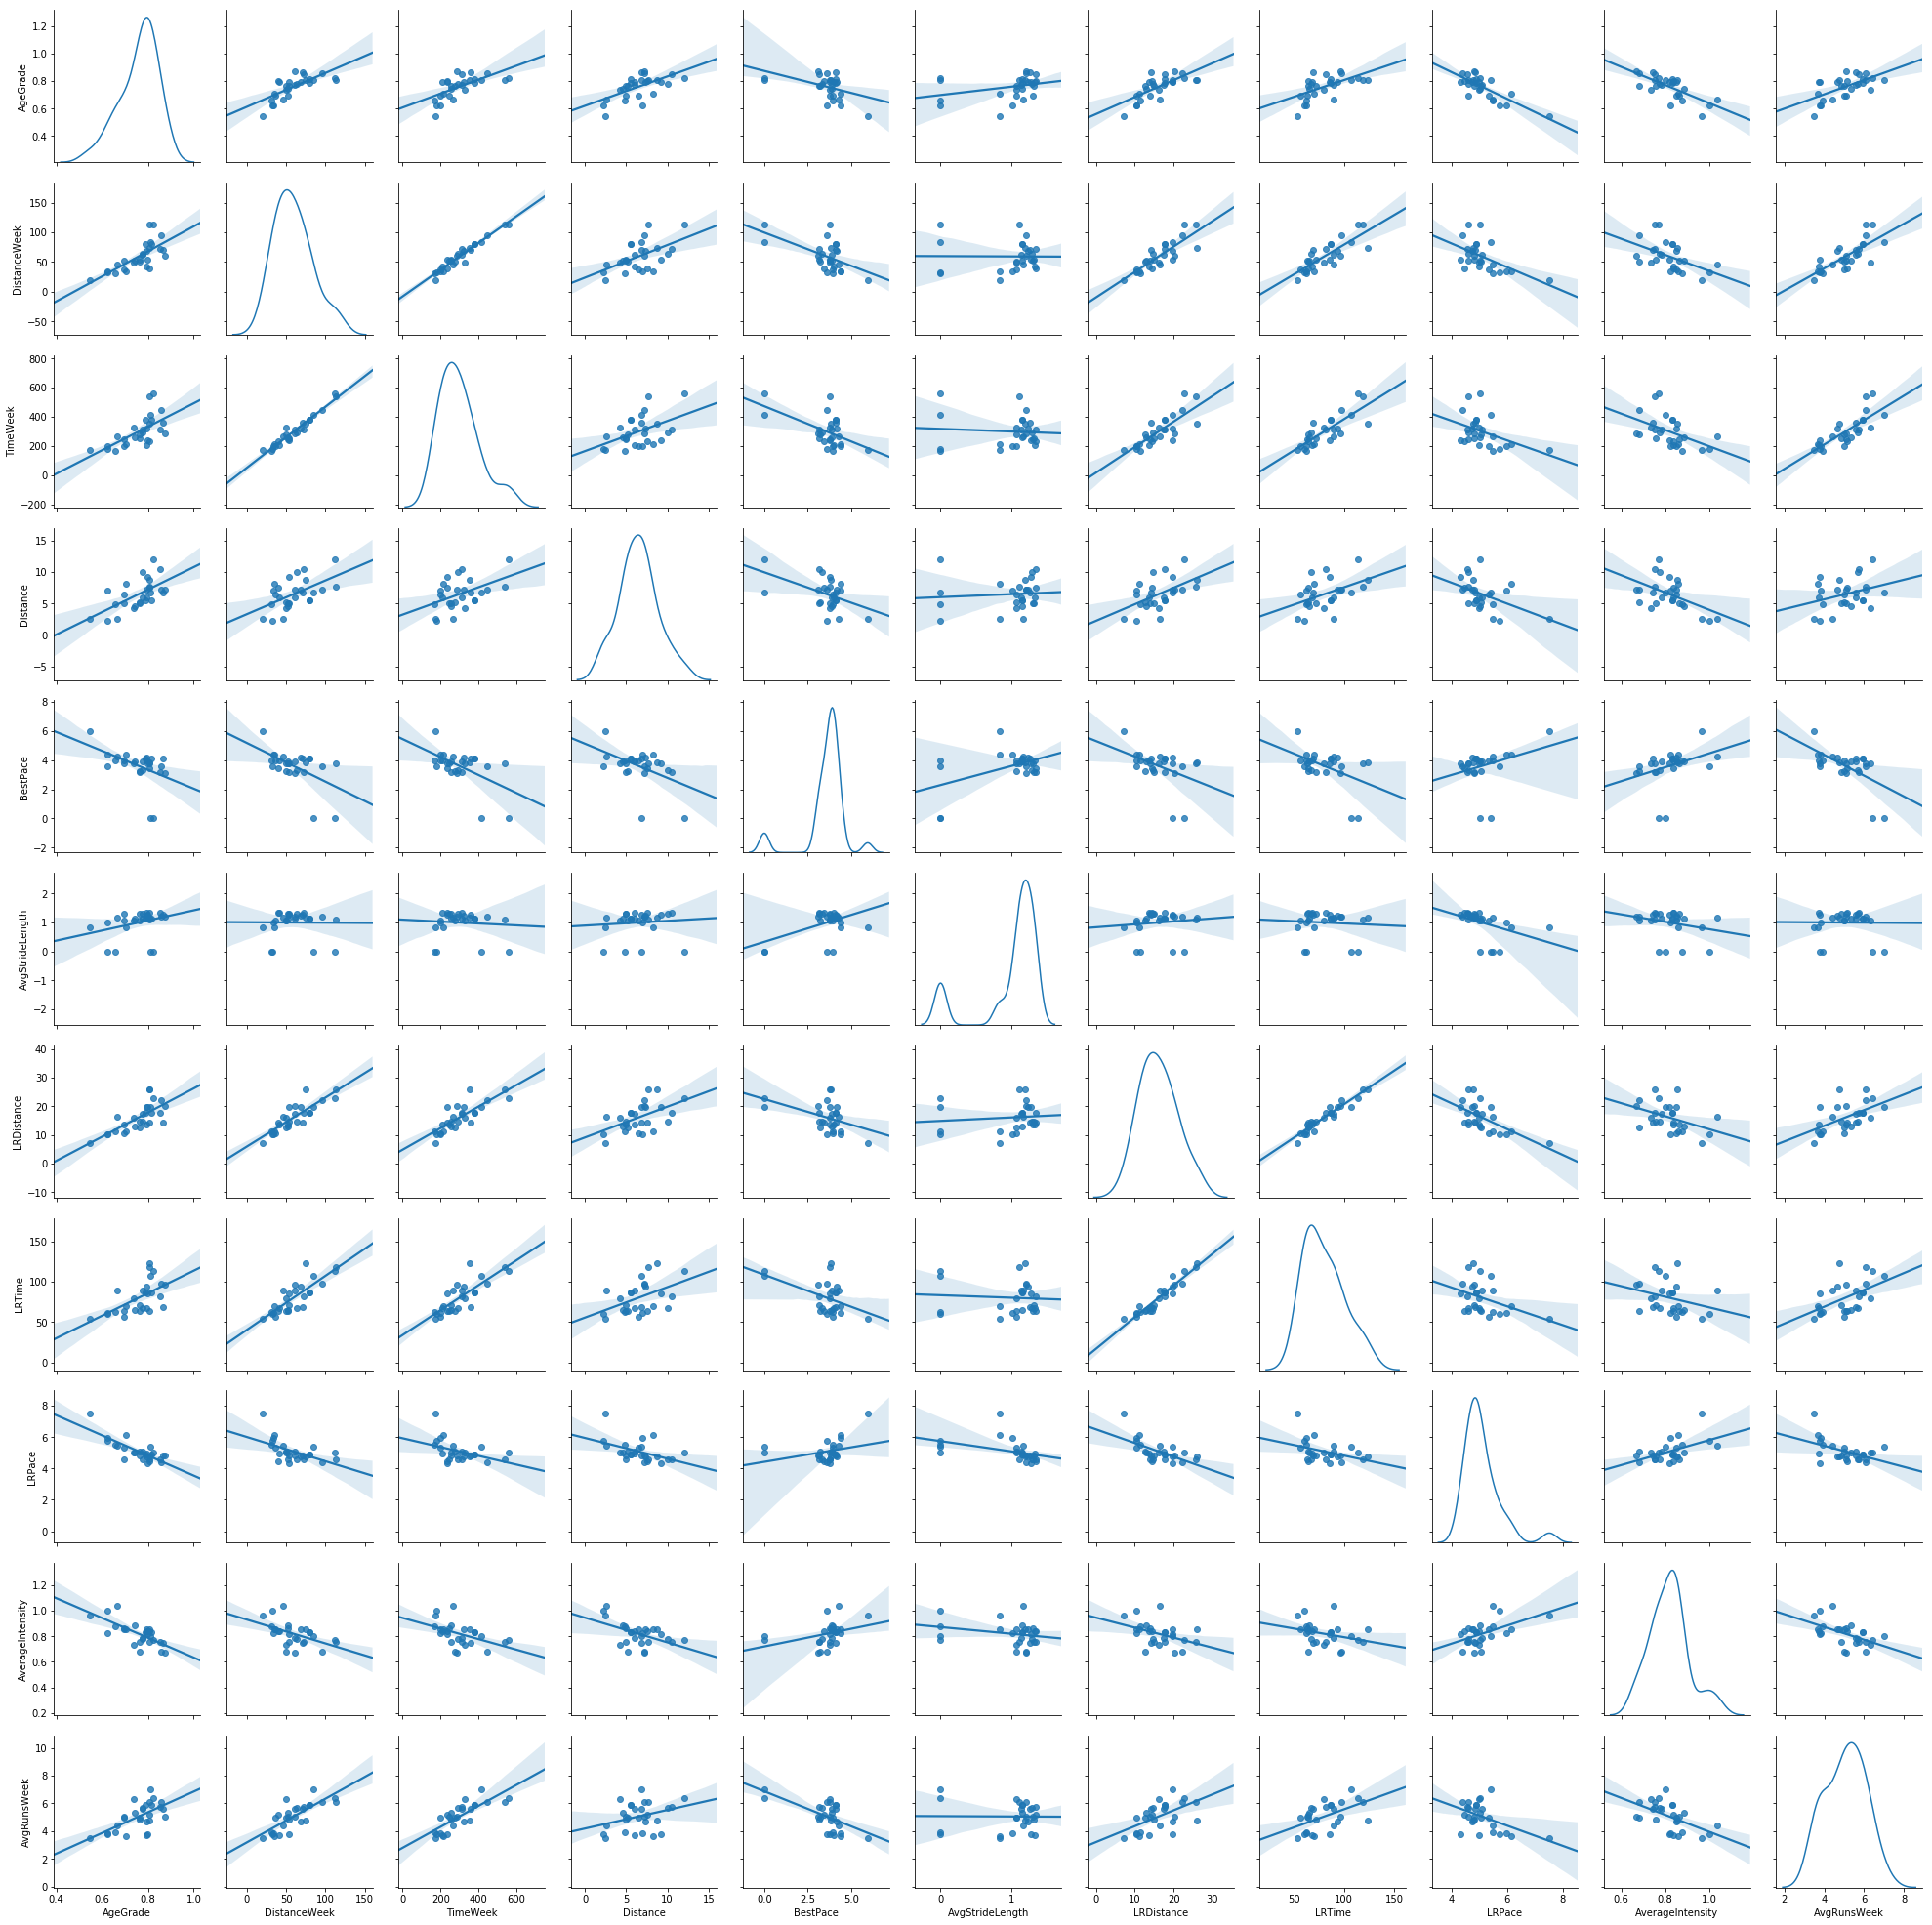

In [12]:
# Pair plot with variables most correlated with Age Grade
sns.pairplot(runners[['AgeGrade','DistanceWeek','TimeWeek','Distance','BestPace','AvgStrideLength','LRDistance','LRTime','LRPace','AverageIntensity','AvgRunsWeek']].fillna(0),diag_kind = 'kde', kind = 'reg')

### Linear Regression

To start with we will look at a linear regression

In [174]:
#rename 10kmResult column, linear regression formula doesn't like the number
runnerslm = runners.rename(columns={'10kmResult': 'Result'})

In [47]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='Result ~ Age + GenderMale', data=runnerslm).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Result   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     17.42
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           1.83e-05
Time:                        18:53:49   Log-Likelihood:                -82.373
No. Observations:                  28   AIC:                             170.7
Df Residuals:                      25   BIC:                             174.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9502      2.468     12.134      0.000      24.867      35.034
Age            0.3968      0.071      5.561      0.000       0.250       0.544
GenderMale    -5.6718      1.871     -3.032      0.006      -9.524      -1.819
==============================================================================
Omnibus:                        5.865   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                4.049
Skew:                           0.728   Prob(JB):                        0.132
Kurtosis:                       4.162   Cond. No.                         95.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

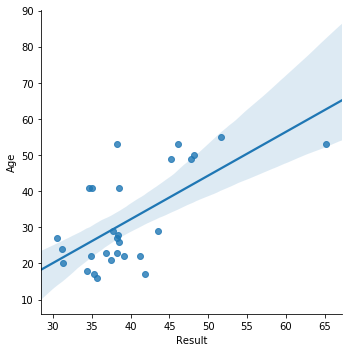

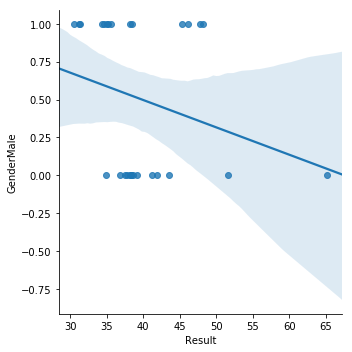

In [59]:
sns.lmplot(x="Result", y="Age", data=runnerslm)
sns.lmplot(x="Result", y="GenderMale", data=runnerslm)

There is a well known correlation with running performance and Age and Gender. So much so that there are age grading factors maintained and applied to most running events. More information about the age grading factors can be found at: http://www.runscore.com/Alan/AgeGrade.html. We will use age graded results for a fair comparison of how good the 10km result was for the age and gender of the runner.

In [289]:
# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='AgeGrade ~ DistanceWeek + AvgStrideLength', data=runnerslm).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AgeGrade   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     20.51
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           7.71e-06
Time:                        20:47:32   Log-Likelihood:                 41.725
No. Observations:                  26   AIC:                            -77.45
Df Residuals:                      23   BIC:                            -73.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5375      0.037     14.580      0.000       0.461       0.614
DistanceWeek        0.0022      0.001      4.168      0.000       0.001       0.003
AvgStrideLength     0.0846      0.033      2.537      0.018       0.016       0.154
==============================================================================
Omnibus:                        0.765   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.571
Skew:                          -0.345   Prob(JB):                        0.752
Kurtosis:                       2.776   Cond. No.                         266.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note it is very difficult to build a linear model with multiple predictors as we have a lot of multicolinearity.
Distance per week and Time per week appear to be the best predictors.
However we also find correlations with these predictors and most of the other predictors.
I.e. runners who run more distance per week, also run longer distance per run, longer long runs, more runs per week, have a faster long run pace, and have a lower average training intensity. This is the majority of our values that correlate with Age Grade.

In [288]:
# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='AgeGrade ~ DistanceWeek', data=runnerslm).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AgeGrade   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     28.36
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           1.43e-05
Time:                        20:47:25   Log-Likelihood:                 41.404
No. Observations:                  28   AIC:                            -78.81
Df Residuals:                      26   BIC:                            -76.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6121      0.030     20.578      0.000       0.551       0.673
DistanceWeek     0.0025      0.000      5.325      0.000       0.002       0.003
==============================================================================
Omnibus:                        0.022   Durbin-Watson:                   2.333
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.221
Skew:                          -0.014   Prob(JB):                        0.895
Kurtosis:                       2.565   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### AgeGrade Dummies

In [17]:
runners.loc[runners['AgeGrade'] > 0.9, 'WorldClass'] = 1
runners.loc[(runners['AgeGrade'] <= 0.9) & (runners['AgeGrade'] > 0.8), 'NationalClass'] = 1
runners.loc[(runners['AgeGrade'] <= 0.8) & (runners['AgeGrade'] > 0.7), 'RegionalClass'] = 1
runners.loc[(runners['AgeGrade'] <= 0.7) & (runners['AgeGrade'] > 0.6), 'LocalClass'] = 1
runners[['WorldClass','NationalClass','RegionalClass','LocalClass']] = runners[['WorldClass','NationalClass','RegionalClass','LocalClass']].replace(np.nan,0)

In [18]:
runners

,AthleteID,Gender,Age,TrainingAge,10kmResult,ResultRating,DistanceWeek,TimeWeek,ElevGainWeek,ElevLossWeek,...,LRPace,LRIntensity,AverageIntensity,TSSWeek,CrossTrainWeek,AvgRunsWeek,WorldClass,NationalClass,RegionalClass,LocalClass
0,1,Female,21,6,37.433333,5,84.180833,414.013889,1270.500000,0.000000,...,5.390909,0.720349,0.801385,435.718593,34.261111,7.000000,0.0,1.0,0.0,0.0
1,2,Female,53,6,65.116667,3,20.385833,173.346111,90.500000,88.333333,...,7.525758,0.868130,0.964859,251.587339,24.250000,3.500000,0.0,0.0,0.0,0.0
2,3,Male,20,7,31.300000,2,72.073333,312.822222,338.916667,337.750000,...,4.562121,0.716041,0.752987,298.529724,45.833333,5.750000,0.0,1.0,0.0,0.0
3,4,Male,41,6,34.616667,5,113.564167,538.052500,430.750000,479.583333,...,4.586364,0.784936,0.754326,523.148636,35.000000,6.083333,0.0,1.0,0.0,0.0
4,5,Female,29,15,37.716667,4,39.784167,233.135278,277.333333,275.500000,...,4.469697,0.872542,0.837771,283.787998,91.030952,5.166667,0.0,1.0,0.0,0.0
5,6,Female,22,10,39.150000,4,61.570833,311.312222,218.833333,226.916667,...,5.093939,0.795062,0.784798,336.359021,54.351667,5.583333,0.0,0.0,1.0,0.0
6,7,Female,55,7,51.600000,4,34.975833,214.612500,139.666667,154.916667,...,6.165152,0.848857,0.858096,261.775830,81.704630,3.666667,0.0,0.0,1.0,0.0
7,8,Male,26,7,38.483333,4,52.523333,245.824167,157.750000,167.583333,...,4.580303,0.869666,0.863229,323.557965,NaN,5.083333,0.0,0.0,0.0,1.0
8,9,Female,22,7,34.950000,5,71.275000,358.107500,254.500000,260.916667,...,4.859091,0.747739,0.746221,340.316978,1.050000,5.583333,0.0,1.0,0.0,0.0
9,10,Male,27,17,30.566667,5,60.672500,285.432917,214.583333,198.750000,...,4.818182,0.664151,0.669506,223.303922,NaN,5.083333,0.0,1.0,0.0,0.0


In [19]:
# create a clean data frame for the regression
# cols_to_keep = ['WorldClass','NationalClass','RegionalClass','LocalClass','DistanceWeek','TimeWeek','Distance','LRDistance','LRTime','LRPace','AverageIntensity','AvgRunsWeek']
cols_to_keep = ['WorldClass','NationalClass','RegionalClass','LocalClass','TimeWeek','Distance','LRTime','LRPace','AverageIntensity','AvgRunsWeek']
data = runners[cols_to_keep]
#data.info()
#data = data.dropna()
#data.info()
data['intercept'] = 1.0
# Set the covariates
train_cols = data.columns[4:]
# Fit the model
logit = sm.Logit(data['NationalClass'], data[train_cols])
result = logit.fit(maxiter=5000)

/Users/benmudie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Optimization terminated successfully.
         Current function value: 0.273526
         Iterations 10


In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          NationalClass   No. Observations:                   28
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            6
Date:                Mon, 06 Aug 2018   Pseudo R-squ.:                  0.5803
Time:                        18:29:47   Log-Likelihood:                -7.6587
converged:                       True   LL-Null:                       -18.249
                                        LLR p-value:                  0.001702
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
TimeWeek             0.0161      0.023      0.698      0.485      -0.029       0.061
Distance             0.2372      0.516      0.460      0.646      -0.774       1.248
LRTime               0.0638      0.065      0.983      0.326      -0.063       0.191
LRPace              -5.8998      6.600     -0.894      0.371     -18.835       7.035
AverageIntensity   -11.9256     13.958     -0.854      0.393     -39.283      15.432
AvgRunsWeek          1.5170      1.755      0.864      0.388      -1.924       4.958
intercept           17.1306     30.450      0.563      0.574     -42.550      76.811
====================================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

cols_to_keep = ['WorldClass','NationalClass','RegionalClass','LocalClass','DistanceWeek','TimeWeek','Distance','LRDistance','LRTime','LRPace','AverageIntensity','AvgRunsWeek']
data = runners[cols_to_keep]
train_cols = data.columns[4:]

X = data[train_cols]
y = data['NationalClass']
    
    
# Fits the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

In [22]:
pred = model.predict(X)
model.predict(X)

array([1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [23]:
from sklearn.cross_validation import cross_val_score

# ... #

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [1.    0.625 0.375 0.75  1.   ], Average AUC 0.75


/Users/benmudie/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
from sklearn import tree, metrics, model_selection
model = tree.DecisionTreeClassifier()

params = {'max_depth': np.arange(1,20,1), 
          'min_samples_leaf': np.arange(1,20,1), 
          'criterion': ['gini', 'entropy']}

gs = model_selection.GridSearchCV(estimator = model, param_grid = params, scoring = 'roc_auc', n_jobs = -1)

gs.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [25]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}

In [26]:
model = DecisionTreeClassifier(
                max_depth = 16,
                min_samples_leaf = 5,
                criterion='gini')

model.fit(X, y)
build_tree_image(model)

In [27]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
0,DistanceWeek,0.891559
2,Distance,0.108441
1,TimeWeek,0.000000
3,LRDistance,0.000000
4,LRTime,0.000000


No handles with labels found to put in legend.


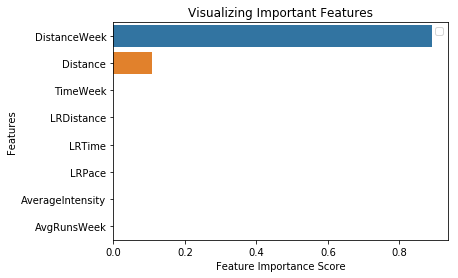

In [28]:
sns.barplot(x=features_df['Importance Score'], y=features_df['Features'])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
0,DistanceWeek,0.217410
6,AverageIntensity,0.181501
1,TimeWeek,0.156177
5,LRPace,0.129058
3,LRDistance,0.099457


No handles with labels found to put in legend.


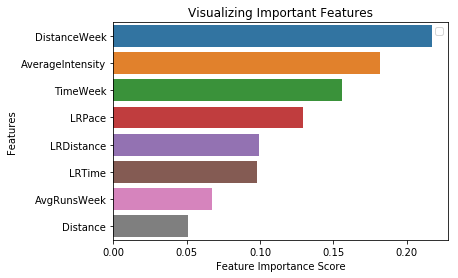

In [31]:
sns.barplot(x=features_df['Importance Score'], y=features_df['Features'])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [32]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 1):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [0.79166667 0.75       0.94444444], Average AUC 0.8287037037037037
n trees: 1, CV AUC [0.79166667 0.41666667 0.66666667], Average AUC 0.6250000000000001
n trees: 2, CV AUC [0.85416667 0.72222222 1.        ], Average AUC 0.8587962962962963
n trees: 3, CV AUC [0.75       0.91666667 1.        ], Average AUC 0.888888888888889
n trees: 4, CV AUC [0.70833333 0.5        0.86111111], Average AUC 0.6898148148148149
n trees: 5, CV AUC [0.70833333 0.66666667 0.91666667], Average AUC 0.763888888888889
n trees: 6, CV AUC [0.64583333 0.63888889 0.88888889], Average AUC 0.7245370370370371
n trees: 7, CV AUC [0.66666667 0.75       0.94444444], Average AUC 0.7870370370370371
n trees: 8, CV AUC [0.8125     0.55555556 1.        ], Average AUC 0.789351851851852
n trees: 9, CV AUC [0.75       0.72222222 1.        ], Average AUC 0.8240740740740741
n trees: 10, CV AUC [0.77083333 0.77777778 0.97222222], Average AUC 0.8402777777777778
n trees: 11, CV AUC [0.75       0.83333333 0.94444444], Average AUC 

n trees: 96, CV AUC [0.8125     0.83333333 0.94444444], Average AUC 0.863425925925926
n trees: 97, CV AUC [0.79166667 0.83333333 0.94444444], Average AUC 0.8564814814814815
n trees: 98, CV AUC [0.77083333 0.83333333 1.        ], Average AUC 0.8680555555555557
n trees: 99, CV AUC [0.83333333 0.80555556 0.94444444], Average AUC 0.8611111111111112


In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 12)
    
model.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
0,DistanceWeek,0.255612
1,TimeWeek,0.247645
7,AvgRunsWeek,0.122884
3,LRDistance,0.094731
6,AverageIntensity,0.084507


No handles with labels found to put in legend.


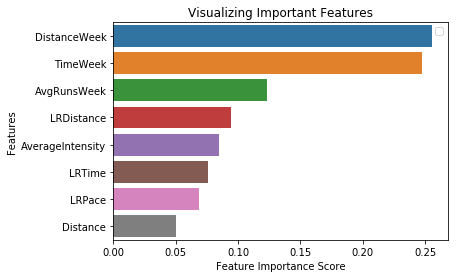

In [35]:
sns.barplot(x=features_df['Importance Score'], y=features_df['Features'])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Re ran model 30 times with 12 estimators

| Variable | Count |
|---|---|
| DistanceWeek | 11 |
| TimeWeek | 8 |
| LRDistance | 4 |
| LRTime | 4 |
| AverageIntensity | 1 |
| Distance | 1 |
| AvgRunsWeek | 1 |

Distance per week and time per week consistantly the most important estimator (these two variables are correlated with each other)

In [143]:
runners[['AthleteID','AvgPace']]

,AthleteID,AvgPace
0,1,4.907770
1,2,6.943027
2,3,4.405488
3,4,4.863936
4,5,4.691892
5,6,5.398623
6,7,6.145667
7,8,4.772667
8,9,6.077371
9,10,4.866502


## Plotting main predictors

### Predictors of raw race result

In [121]:
# Have been looking at the correlation matrix heatmap, this is to double check
corrRaw = runners.corr()
corrRaw = abs(corrRaw['10kmResult'])
corrRaw.sort_values(ascending=False)

10kmResult                1.000000
ThresholdPace             0.999897
LRPace                    0.929483
AgeGrade                  0.891994
BestPace                  0.831760
AverageIntensity          0.718982
LRDistance                0.658380
Age                       0.654683
LRIntensity               0.645769
DistanceWeek              0.645582
AvgRunsWeek               0.590166
Distance                  0.532953
AvgStrideLength           0.532098
TimeWeek                  0.528268
ElevLossWeek              0.496786
NationalClass             0.491115
LRTime                    0.467134
ElevLoss                  0.467013
Calories                  0.400550
LocalClass                0.374232
ElevGainWeek              0.370677
AvgPace                   0.321414
ElevGain                  0.312176
Time                      0.289762
ResultRating              0.282165
TSSWeek                   0.262937
AvgHR                     0.257054
GenderMale                0.255889
MaxHR               

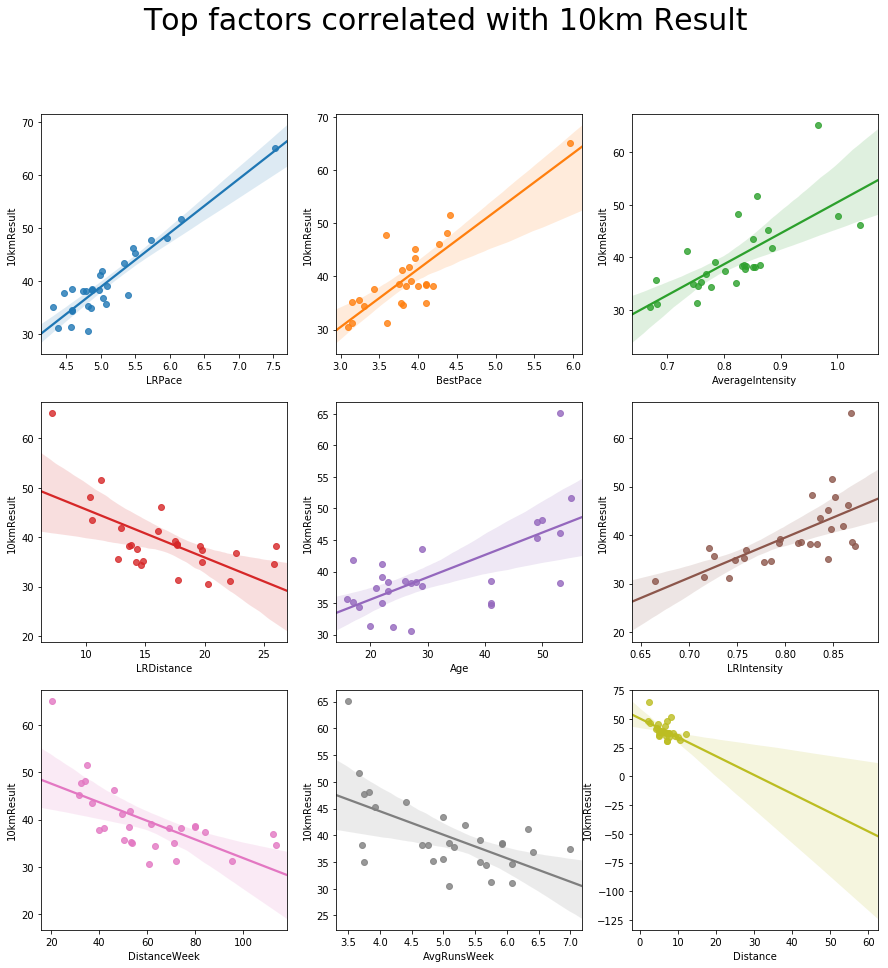

In [128]:
fig, axs = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(15,15)
fig.suptitle('Top factors correlated with 10km Result',fontsize=30)
sns.regplot(x='LRPace', y='10kmResult', data=runners, ax=axs[0,0])
sns.regplot(x='BestPace', y='10kmResult', data=runners, ax=axs[0,1])
sns.regplot(x='AverageIntensity', y='10kmResult', data=runners, ax=axs[0,2])
sns.regplot(x='LRDistance', y='10kmResult', data=runners[(runners['AvgStrideLength'] != 0)], ax=axs[1,0])
sns.regplot(x='Age', y='10kmResult', data=runners, ax=axs[1,1])
sns.regplot(x='LRIntensity', y='10kmResult', data=runners, ax=axs[1,2])
sns.regplot(x='DistanceWeek', y='10kmResult', data=runners, ax=axs[2,0])
sns.regplot(x='AvgRunsWeek', y='10kmResult', data=runners, ax=axs[2,1])
sns.regplot(x='Distance', y='10kmResult', data=runners, ax=axs[2,2])

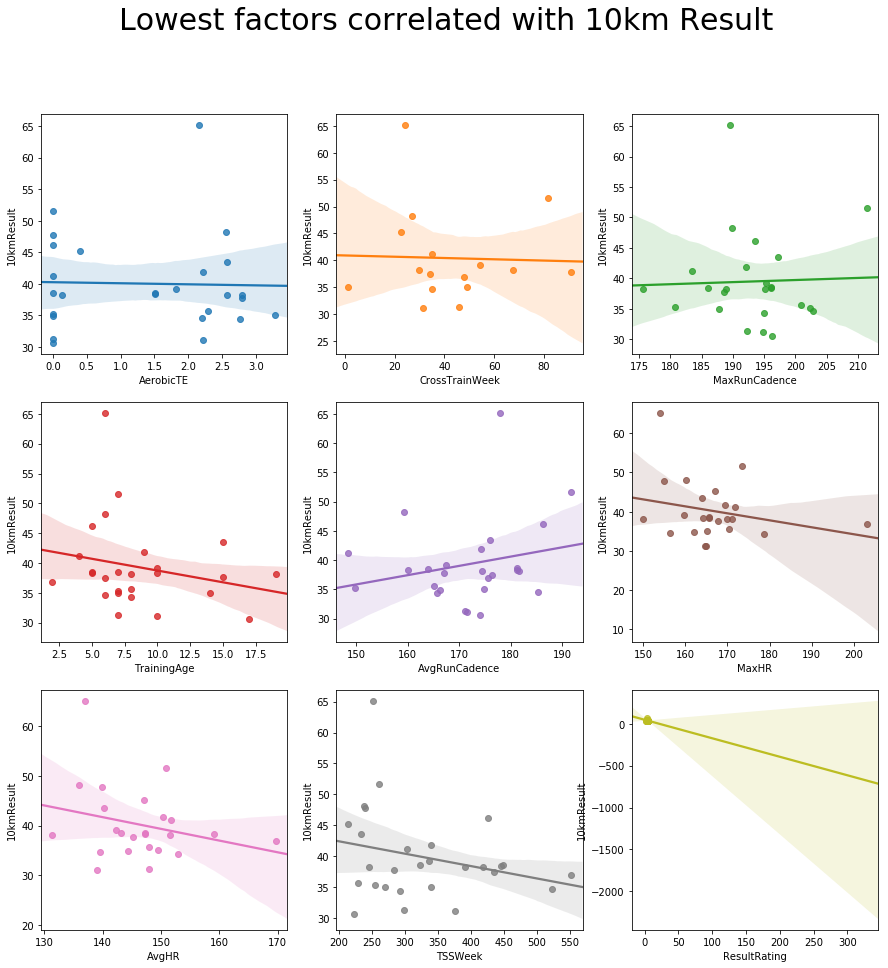

In [139]:
fig, axs = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(15,15)
fig.suptitle('Lowest factors correlated with 10km Result',fontsize=30)
sns.regplot(x='AerobicTE', y='10kmResult', data=runners, ax=axs[0,0])
sns.regplot(x='CrossTrainWeek', y='10kmResult', data=runners, ax=axs[0,1])
sns.regplot(x='MaxRunCadence', y='10kmResult', data=runners, ax=axs[0,2])
sns.regplot(x='TrainingAge', y='10kmResult', data=runners[(runners['AvgStrideLength'] != 0)], ax=axs[1,0])
sns.regplot(x='AvgRunCadence', y='10kmResult', data=runners, ax=axs[1,1])
sns.regplot(x='MaxHR', y='10kmResult', data=runners, ax=axs[1,2])
sns.regplot(x='AvgHR', y='10kmResult', data=runners, ax=axs[2,0])
sns.regplot(x='TSSWeek', y='10kmResult', data=runners, ax=axs[2,1])
sns.regplot(x='ResultRating', y='10kmResult', data=runners, ax=axs[2,2])

### Predictors of Age Graded Result

In [131]:
# Have been looking at the correlation matrix heatmap, this is to double check
corrRaw = runners.corr()
corrRaw = abs(corrRaw['AgeGrade'])
corrRaw.sort_values(ascending=False)

AgeGrade                  1.000000
ThresholdPace             0.893839
10kmResult                0.891994
LRPace                    0.788632
DistanceWeek              0.722267
LRDistance                0.721727
AverageIntensity          0.713874
NationalClass             0.674778
LRIntensity               0.667266
LocalClass                0.648498
TimeWeek                  0.640288
AvgRunsWeek               0.624325
Distance                  0.620086
AvgStrideLength           0.607794
BestPace                  0.605738
LRTime                    0.583233
Age                       0.575515
ElevLoss                  0.447125
ElevLossWeek              0.442015
Time                      0.416459
TSSWeek                   0.394347
ElevGainWeek              0.391767
Calories                  0.391012
ElevGain                  0.332903
AvgHR                     0.319985
MaxHR                     0.278422
AvgPace                   0.277114
ResultRating              0.265144
AthleteID           

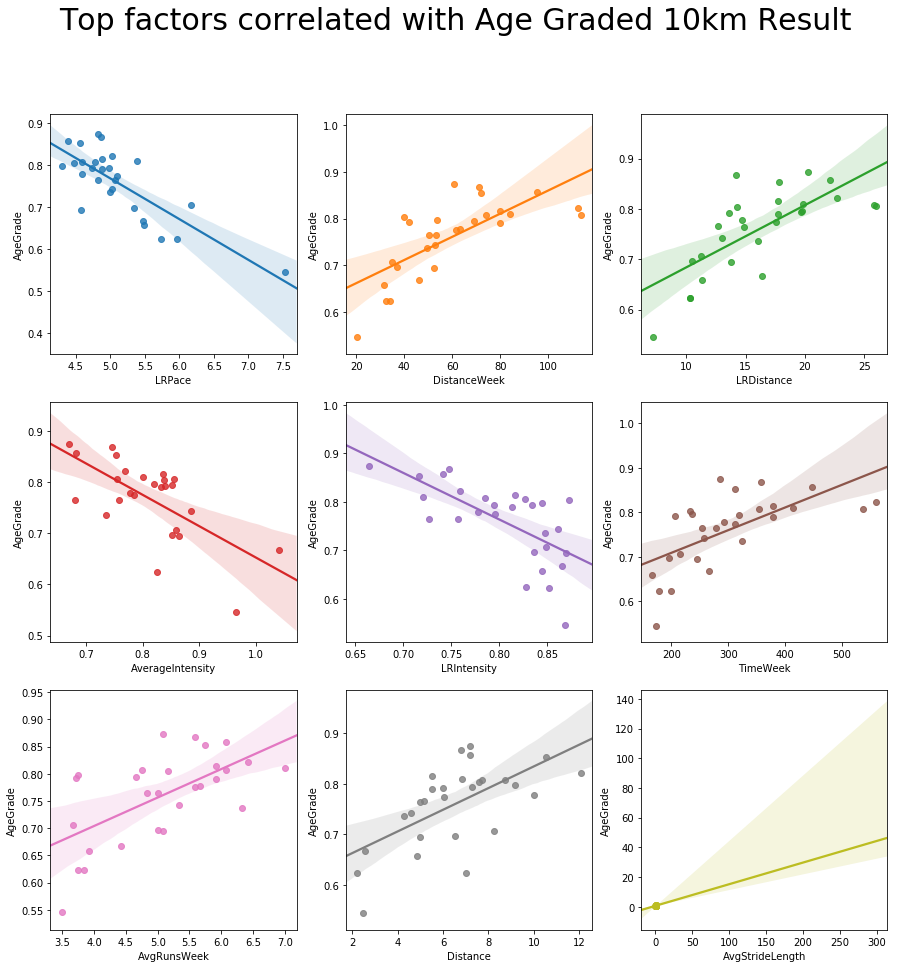

In [140]:
fig, axs = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(15,15)
fig.suptitle('Top factors correlated with Age Graded 10km Result',fontsize=30)
sns.regplot(x='LRPace', y='AgeGrade', data=runners, ax=axs[0,0])
sns.regplot(x='DistanceWeek', y='AgeGrade', data=runners, ax=axs[0,1])
sns.regplot(x='LRDistance', y='AgeGrade', data=runners, ax=axs[0,2])
sns.regplot(x='AverageIntensity', y='AgeGrade', data=runners[(runners['AvgStrideLength'] != 0)], ax=axs[1,0])
sns.regplot(x='LRIntensity', y='AgeGrade', data=runners, ax=axs[1,1])
sns.regplot(x='TimeWeek', y='AgeGrade', data=runners, ax=axs[1,2])
sns.regplot(x='AvgRunsWeek', y='AgeGrade', data=runners, ax=axs[2,0])
sns.regplot(x='Distance', y='AgeGrade', data=runners, ax=axs[2,1])
sns.regplot(x='AvgStrideLength', y='AgeGrade', data=runners, ax=axs[2,2])

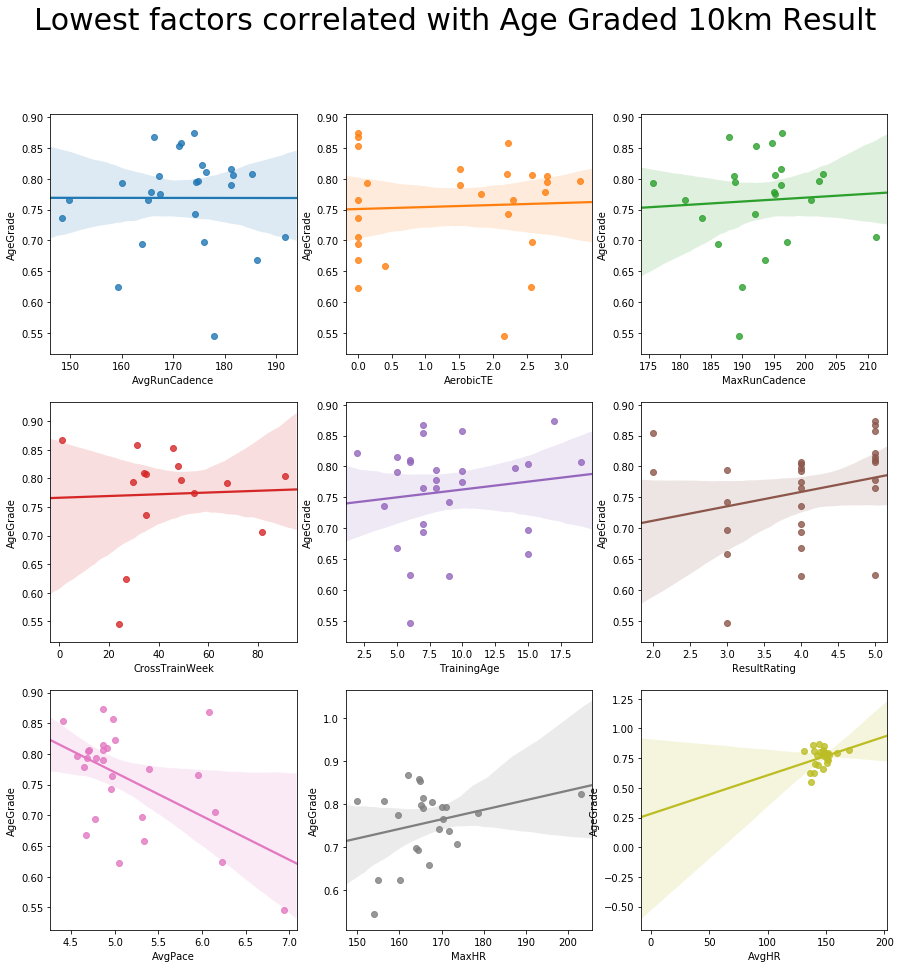

In [144]:
fig, axs = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(15,15)
fig.suptitle('Lowest factors correlated with Age Graded 10km Result',fontsize=30)
sns.regplot(x='AvgRunCadence', y='AgeGrade', data=runners, ax=axs[0,0])
sns.regplot(x='AerobicTE', y='AgeGrade', data=runners, ax=axs[0,1])
sns.regplot(x='MaxRunCadence', y='AgeGrade', data=runners, ax=axs[0,2])
sns.regplot(x='CrossTrainWeek', y='AgeGrade', data=runners[(runners['AvgStrideLength'] != 0)], ax=axs[1,0])
sns.regplot(x='TrainingAge', y='AgeGrade', data=runners, ax=axs[1,1])
sns.regplot(x='ResultRating', y='AgeGrade', data=runners, ax=axs[1,2])
sns.regplot(x='AvgPace', y='AgeGrade', data=runners[(runners['AvgPace'] < 10)], ax=axs[2,0])
sns.regplot(x='MaxHR', y='AgeGrade', data=runners, ax=axs[2,1])
sns.regplot(x='AvgHR', y='AgeGrade', data=runners, ax=axs[2,2])

### Trying clustering on some factors that are non linear

In [145]:
from sklearn.cluster import KMeans, DBSCAN

In [150]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = runners[["AvgRunCadence", "AgeGrade"]].dropna()
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)

[0 1 0 1 0 0 1 0 0 0 1 1 0 2 0 0 1 0 2 0 0 1 0 2 0 2]


In [151]:
#Make function to return list of colours, with a colour for each cluster

def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

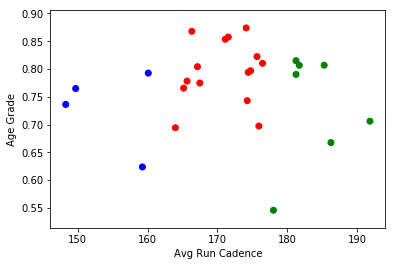

In [153]:
# Plot the data

colors = set_colors(labels)
plt.scatter(X['AvgRunCadence'], X['AgeGrade'], c=colors)
plt.xlabel("Avg Run Cadence")
plt.ylabel("Age Grade")
plt.show()

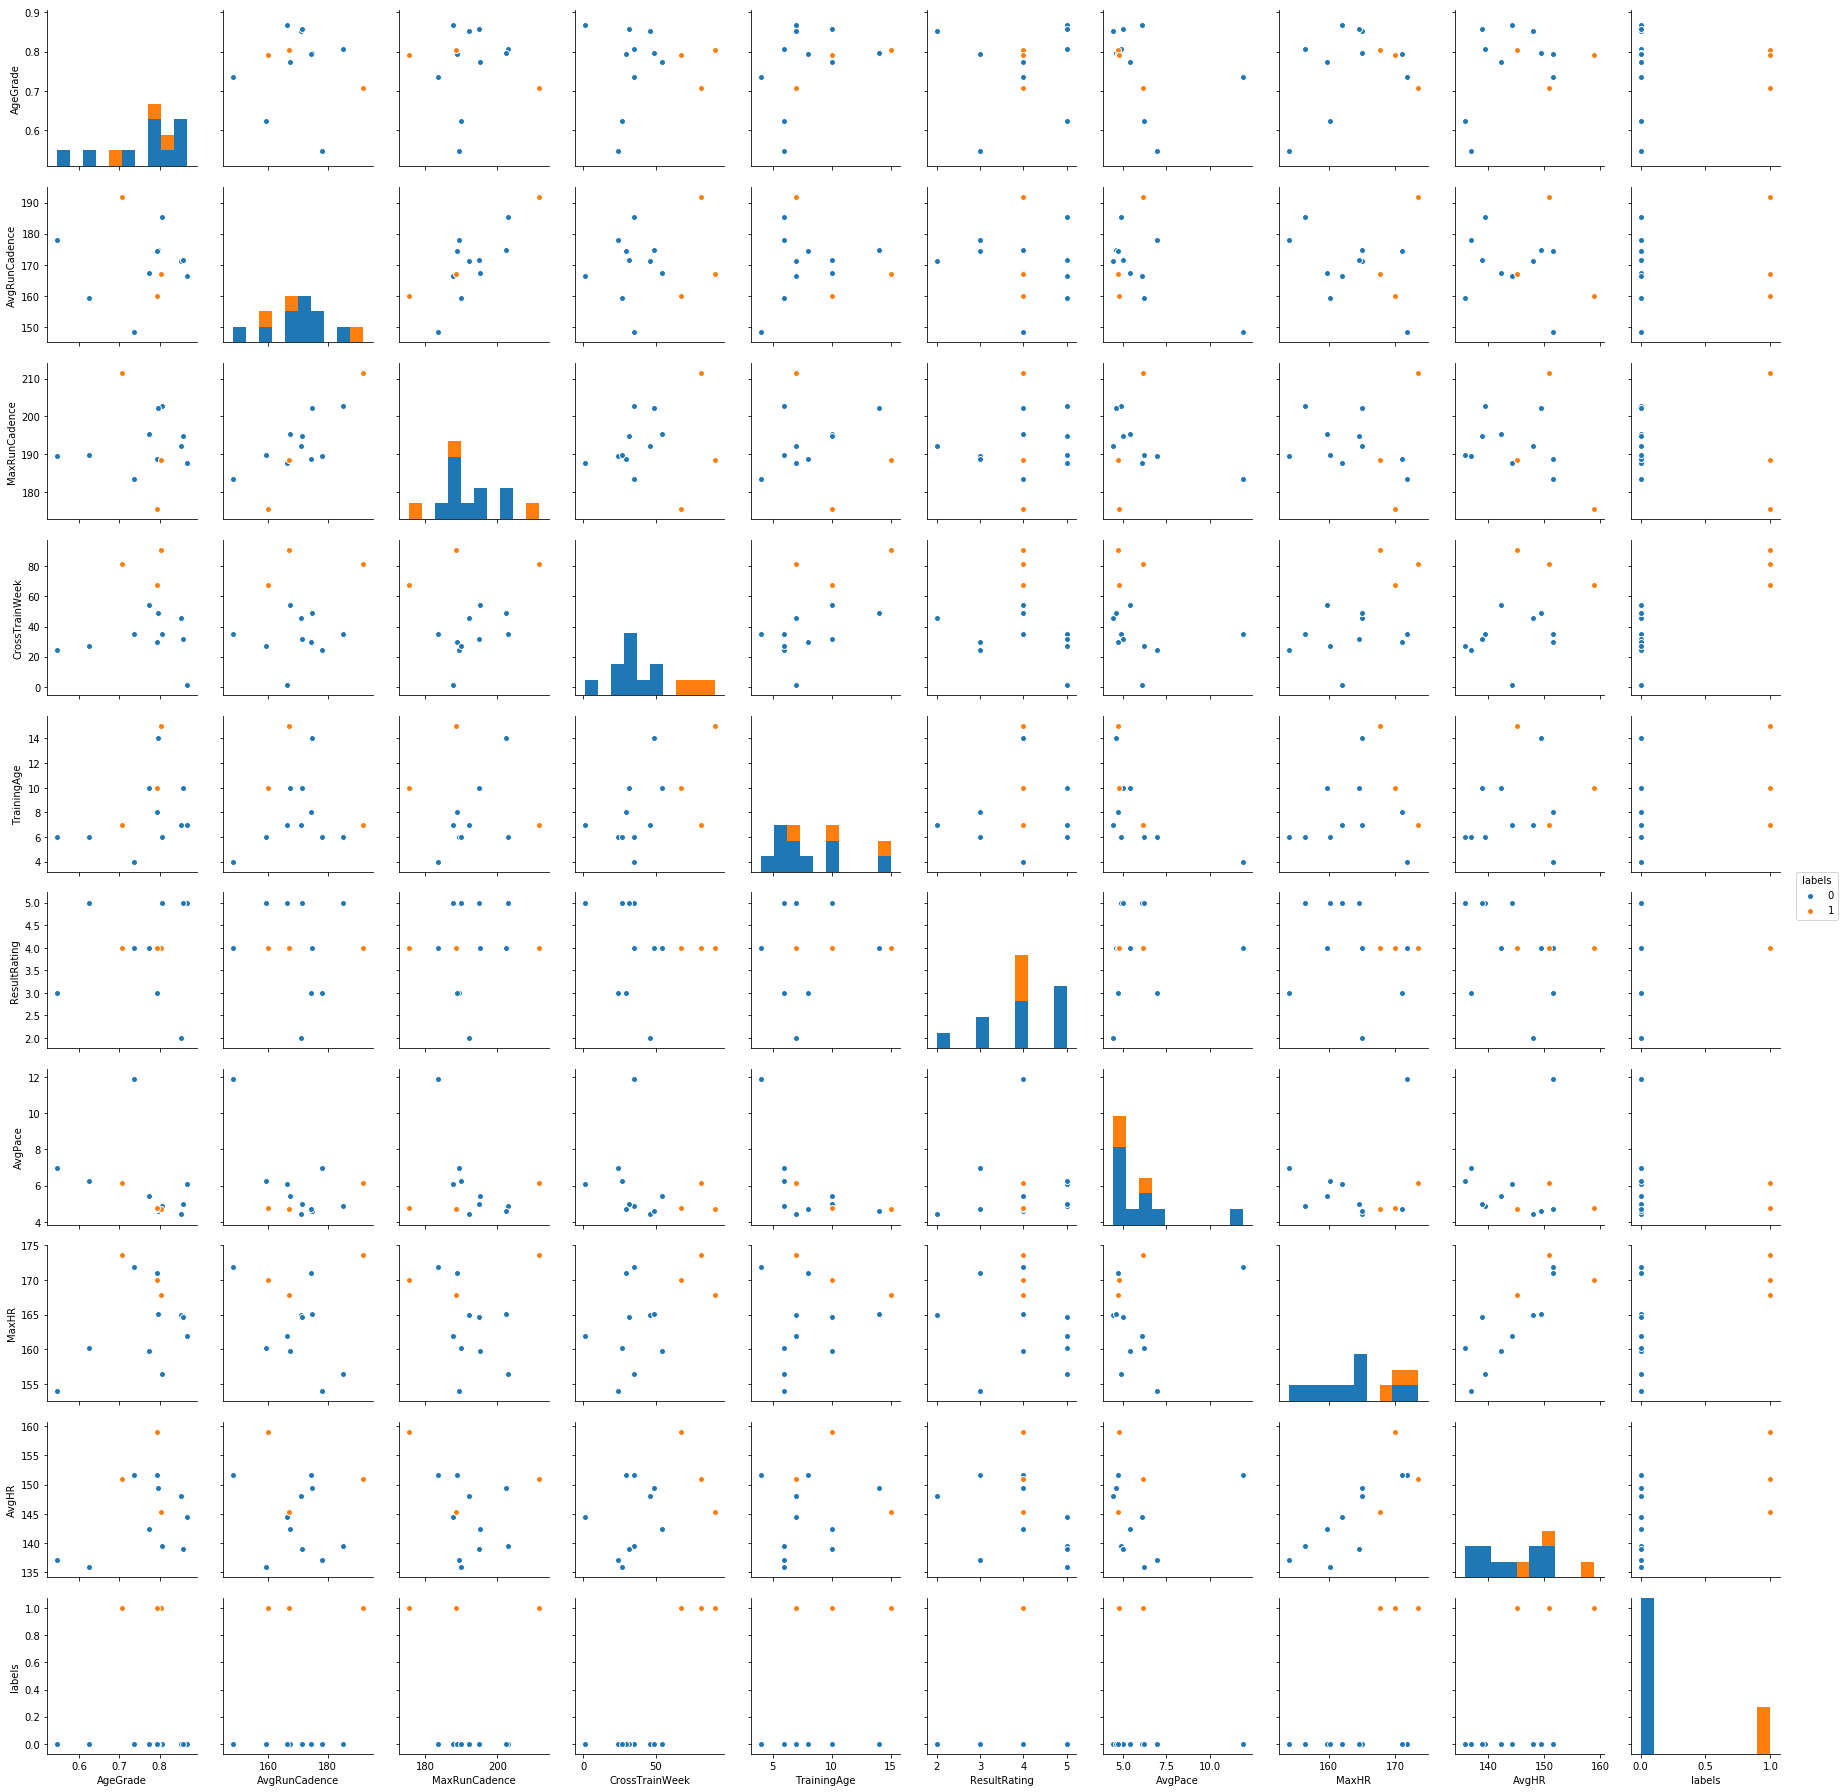

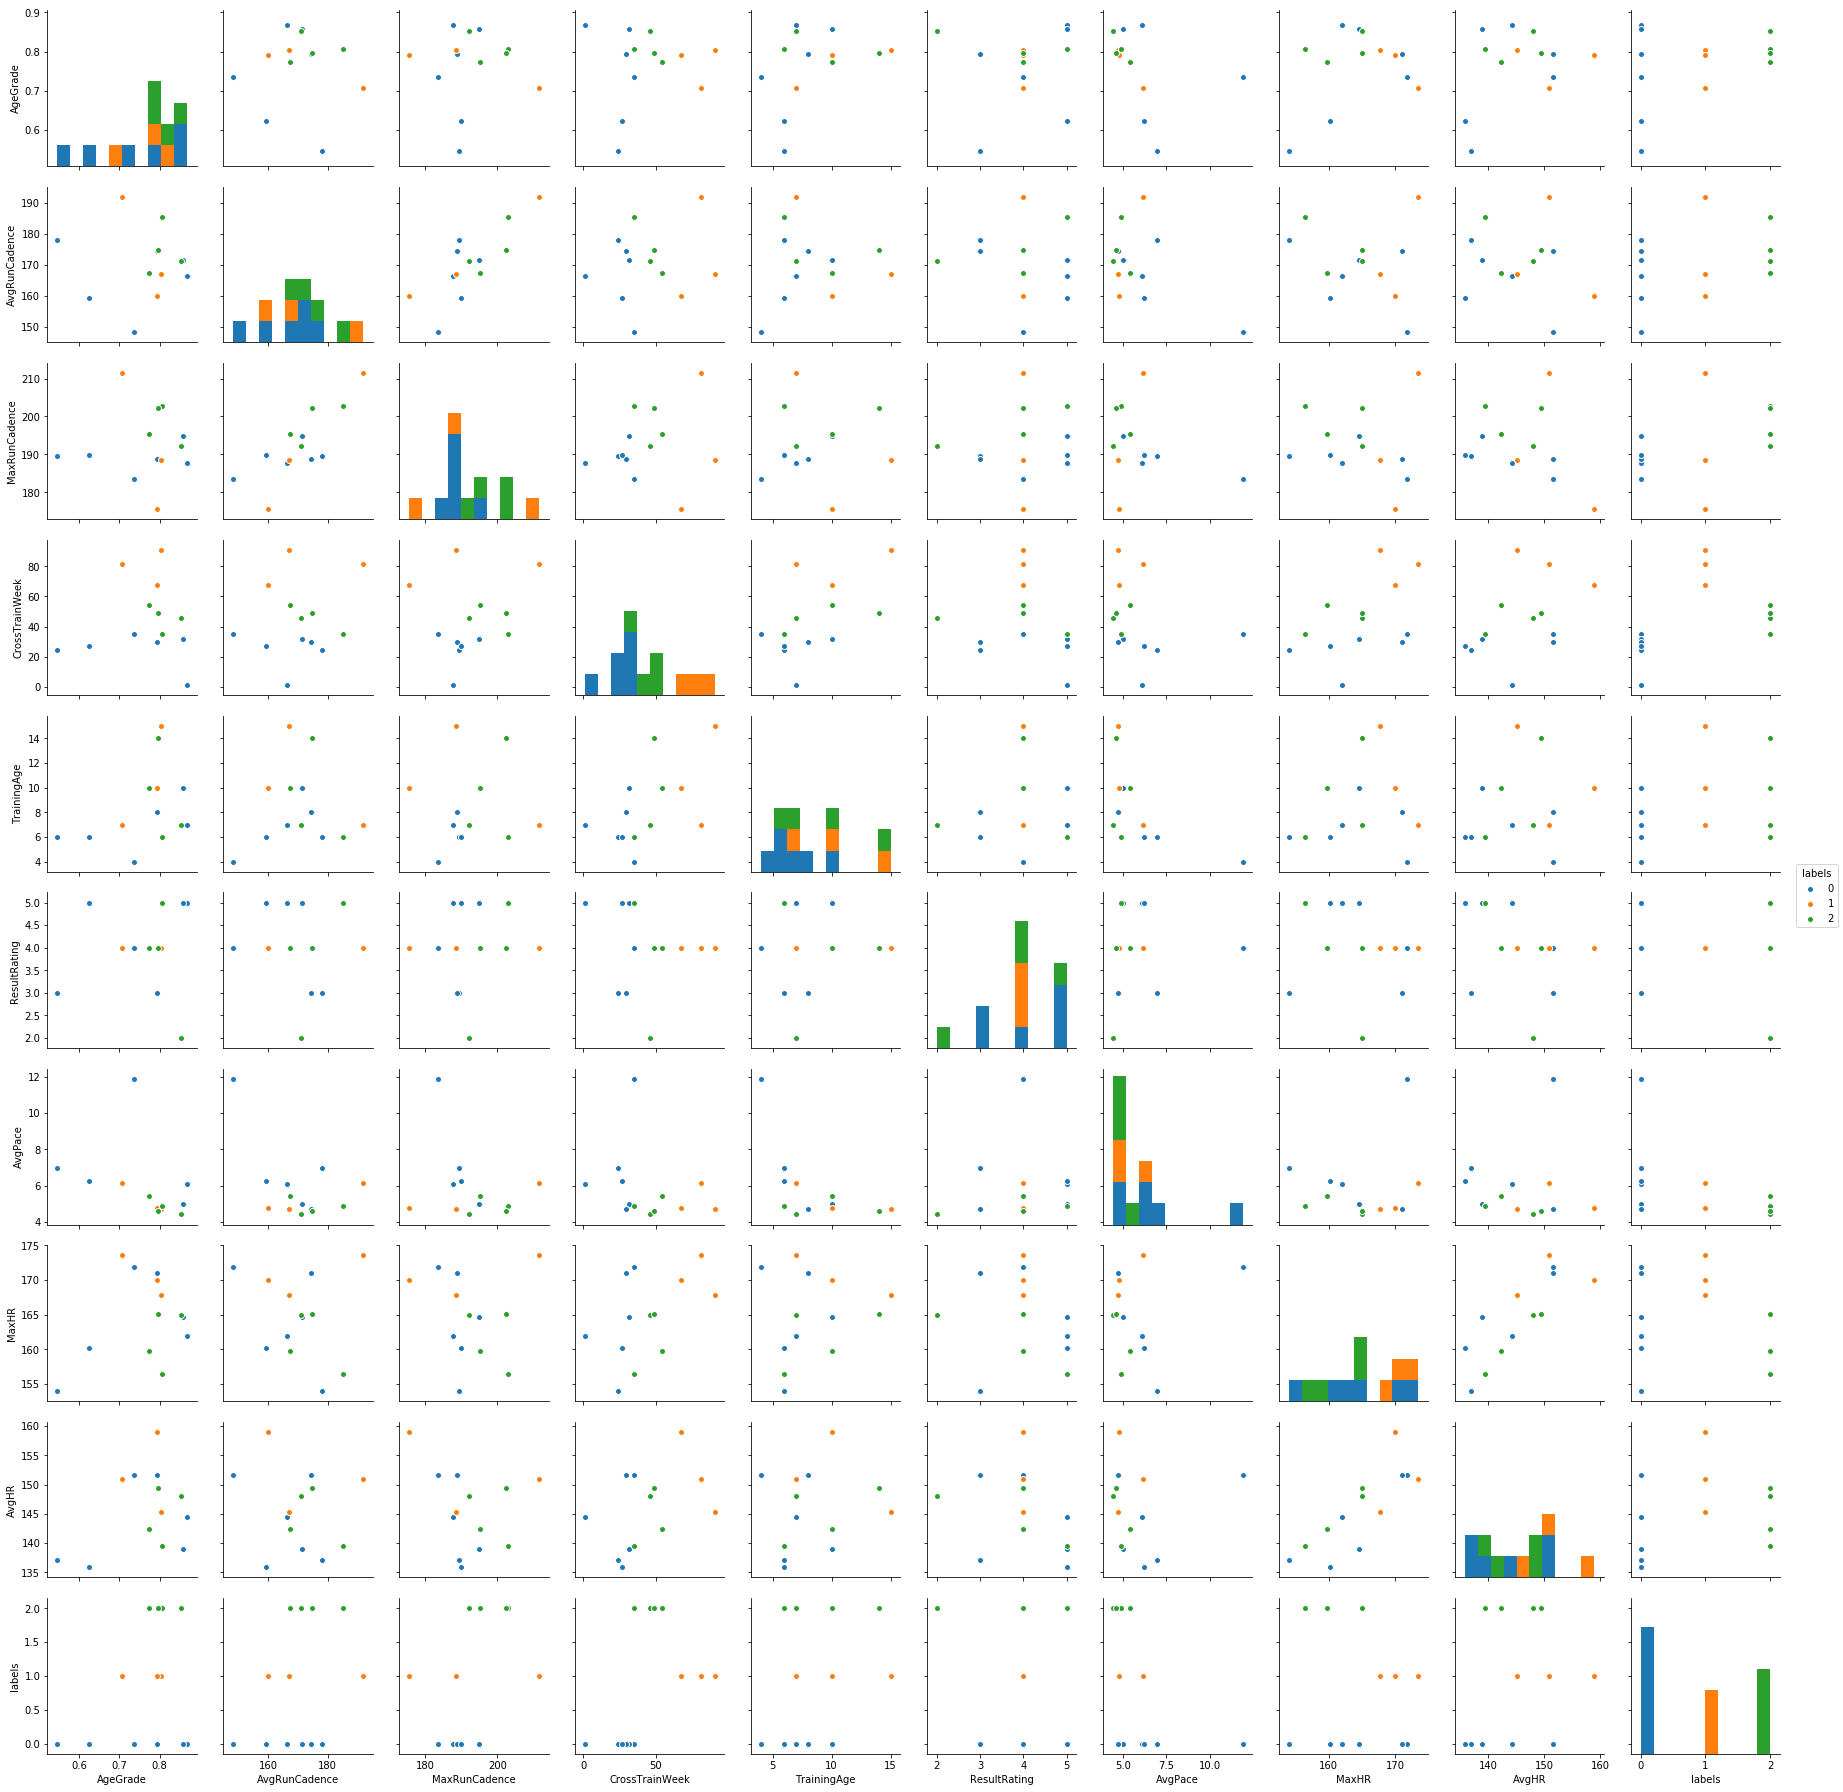

In [158]:
runnersk = runners[['AgeGrade','AvgRunCadence','MaxRunCadence','CrossTrainWeek','TrainingAge','ResultRating','AvgPace','MaxHR','AvgHR']].dropna()

for k in [2,3]:
    estimator = KMeans(n_clusters = k)
    estimator.fit(runnersk)
    labels = estimator.labels_
    runnersk['labels'] = labels
    colors = set_colors(labels)
    sns.pairplot(runnersk, hue = 'labels')
    

Don't think we're seeing anything that interesting with clustering

### Refine a linear model

In [190]:
from sklearn import linear_model, metrics
import sklearn
from sklearn import grid_search

In [194]:
from sklearn import cross_validation
params = {'alpha': alphas} # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(max_iter=5),
    cv=cross_validation.KFold(len(runnerslmtune), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(runnerslmtune[['DistanceWeek','AvgStrideLength']], runnerslmtune['AgeGrade'])

print('BEST ESTIMATOR')
print(gs.best_score_)
print(gs.best_estimator_)
print('ALL ESTIMATORS')
print(gs.grid_scores_)

BEST ESTIMATOR
-1.4178398503974586e+25
SGDRegressor(alpha=0.1, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
ALL ESTIMATORS
[mean: -56979028554473140134084608.00000, std: 82857716273811277530267648.00000, params: {'alpha': 1e-10}, mean: -111261650520409024780828672.00000, std: 114112535503221741980745728.00000, params: {'alpha': 1e-09}, mean: -58500384804398272855670784.00000, std: 51517454302685240932433920.00000, params: {'alpha': 1e-08}, mean: -108013753983991268562173952.00000, std: 102249305326281389303136256.00000, params: {'alpha': 1e-07}, mean: -23152224849546394669678592.00000, std: 20069119069877432590794752.00000, params: {'alpha': 1e-06}, mean: -43980419978040223467569152.00000, std: 38398521072734787214508032.00000, params: {'alpha': 1e-05}, mean:

In [251]:
runnerslmtune = runnerslm[['AgeGrade','DistanceWeek']].dropna()
X = runnerslmtune[['DistanceWeek']]
y = runnerslmtune[['AgeGrade']]
#Tuning without the fuss
params = {'alpha': np.logspace(-1, 100, 100,True,20), 'fit_intercept': [True, False], 'normalize': [True, False]}
gs = model_selection.GridSearchCV(linear_model.Lasso(), 
                                  param_grid = params, 
                                  cv = 5, 
                                  n_jobs = -1, 
                                  scoring = 'r2')
gs.fit(X,y);
gs.best_params_

{'alpha': 0.05, 'fit_intercept': True, 'normalize': False}

In [252]:
print('Best r2 score: {}'.format(gs.best_score_))
print('Best mse score: {}'.format(metrics.mean_squared_error(y, gs.predict(X))))

Best r2 score: 0.4425980163732842
Best mse score: 0.003046474061322905


In [253]:
gs.predict(X)

array([0.81844621, 0.66627355, 0.78956573, 0.8885354 , 0.71254514,
       0.76451371, 0.70107564, 0.74293236, 0.78766143, 0.76237088,
       0.80802029, 0.80802029, 0.74529782, 0.73551396, 0.88597906,
       0.70565748, 0.72772782, 0.84533493, 0.7175819 , 0.74350882,
       0.78265421, 0.79457891, 0.6951759 , 0.69259179, 0.7688431 ,
       0.69863265, 0.73752758, 0.74484461])

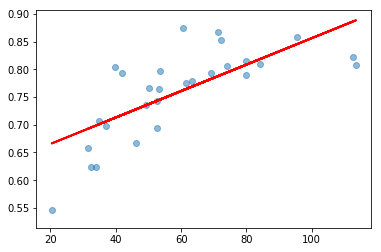

In [254]:
predictions = gs.predict(X)
plt.scatter(runnerslmtune[['DistanceWeek']], runnerslmtune['AgeGrade'], alpha = 0.5)
plt.plot(X, predictions, color = 'r', linewidth = 2)
plt.show()

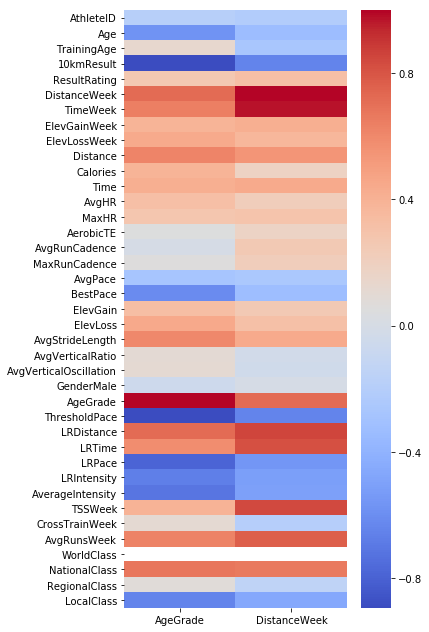

In [247]:
plt.figure(figsize=(5,11))
corrcheck = runners.corr()
corrcheck = corrcheck[['AgeGrade','DistanceWeek']]
sns.heatmap(corrcheck, cmap='coolwarm')

I can't seem to really improve the model by adding variables additional to DistanceWeek. Too much colinearity?

In [273]:
# Quadratic Fit
runnerslmtune = runnerslm[['AgeGrade','DistanceWeek']].dropna()
runnerslmtune['DistanceWeek2'] = runnerslmtune['DistanceWeek'] ** 2

X = runnerslmtune[['DistanceWeek','DistanceWeek2']]
y = runnerslmtune[['AgeGrade']]
#Tuning without the fuss
params = {'alpha': np.logspace(-1, 100, 100,True,20), 'fit_intercept': [True, False], 'normalize': [True, False]}
gs = model_selection.GridSearchCV(linear_model.Lasso(), 
                                  param_grid = params, 
                                  cv = 5, 
                                  n_jobs = -1, 
                                  scoring = 'r2')
gs.fit(X,y);
gs.best_params_

{'alpha': 0.05, 'fit_intercept': True, 'normalize': False}

In [274]:
print('Best r2 score: {}'.format(gs.best_score_))
print('Best mse score: {}'.format(metrics.mean_squared_error(y, gs.predict(X))))

Best r2 score: 0.6502931912957413
Best mse score: 0.0018310391251988559


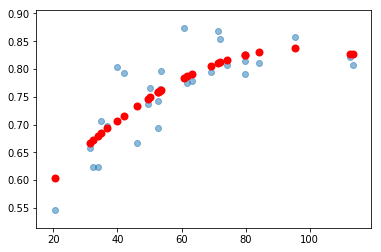

In [275]:
# A better fit with quadratic
predictions = gs.predict(X)
plt.scatter(X['DistanceWeek'], runnerslmtune['AgeGrade'], alpha = 0.5)
plt.scatter(X['DistanceWeek'], predictions, color = 'r', linewidth = 2)
plt.show()

## Explaining things (presentation prep)

Our sample population
- Data collected for 28 runners
- Equal number of male and females
- A range of age groups
- Average finish time of 39.8 minutes. Fastest 30.6 mins, and last to finish was 65.1 mins.

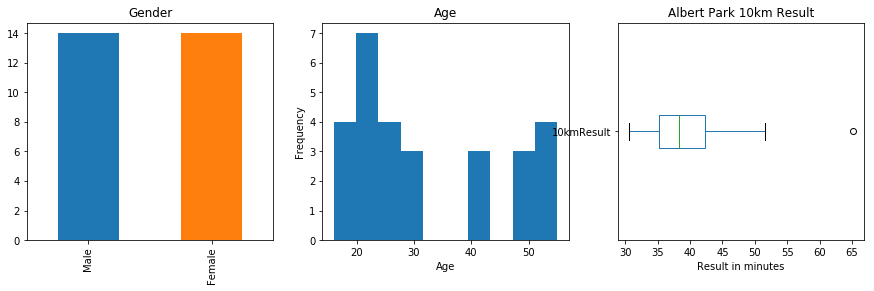

In [284]:
fig, ax = plt.subplots(1,3)
runners['Gender'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Gender')
runners['Age'].plot.hist(ax = ax[1])
ax[1].set_title('Age')
ax[1].set_xlabel('Age')
runners['10kmResult'].plot.box(vert=False, ax = ax[2])
ax[2].set_title('Albert Park 10km Result')
ax[2].set_xlabel('Result in minutes')
fig.set_figwidth(15)

In [287]:
runners['10kmResult'].describe()

count    28.000000
mean     39.813095
std       7.224983
min      30.566667
25%      35.187500
50%      38.233333
75%      42.250000
max      65.116667
Name: 10kmResult, dtype: float64

There is a correlation between Age and Result. Typically younger runners run faster times.

Age grading factors are maintained and applied to most running events. More information about the age grading factors can be found at: http://www.runscore.com/Alan/AgeGrade.html. We will use age graded results for a fair comparison of how good the 10km result was for the age and gender of the runner.

The output of the age grading can be understood as:

| Age graded Percentage | guidelines as stated by the WMA |
| --- | --- |
| Above 100% | Usually, at least, a record setting performance for that age and distance |
| 100% | Approximate world record level |
| Above 90% | World Class Level |
| Above 80% | National Class Level |
| Above 70% | Regional Class Level |
| Above 60% | Local Class Level |

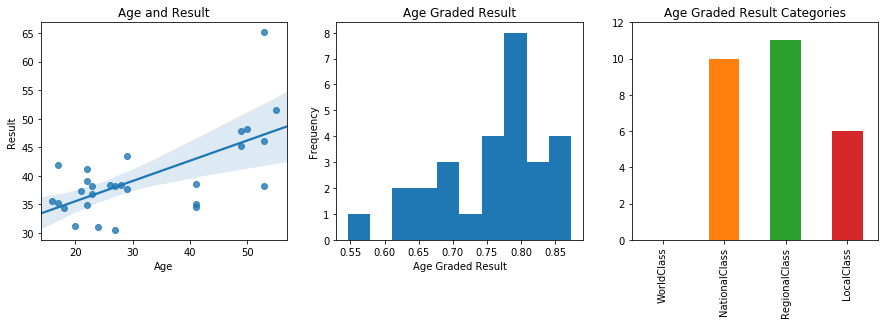

In [334]:
fig, ax = plt.subplots(nrows=1,ncols=3)
sns.regplot(x="Age", y="Result", data=runnerslm, ax = ax[0])
ax[0].set_title('Age and Result')
runners['AgeGrade'].plot.hist(ax = ax[1])
ax[1].set_title('Age Graded Result')
ax[1].set_xlabel('Age Graded Result')
runners[['WorldClass','NationalClass','RegionalClass','LocalClass']].sum().plot.bar(ax = ax[2])
ax[2].set_title('Age Graded Result Categories')
ax[2].set_ylim(0,12)
fig.set_figwidth(15)

The relationship between Age and Result is statistically significant. p < 0.005

In [336]:
# Linear model
lm = smf.ols(formula='Result ~ Age', data=runnerslm).fit()
# Print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Result   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     19.50
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           0.000157
Time:                        22:29:39   Log-Likelihood:                -86.757
No. Observations:                  28   AIC:                             177.5
Df Residuals:                      26   BIC:                             180.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4727      2.775     10.261      0.000      22.769      34.177
Age            0.3544      0.080      4.416      0.000       0.189       0.519
==============================================================================
Omnibus:                       10.260   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.739
Skew:                           0.880   Prob(JB):                      0.00466
Kurtosis:                       5.472   Cond. No.                         91.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Futher presentation notes
Using a correlation matrix it was found the training factors most correlated with Age Graded Result were:
- Long run pace
- Distance per week
- Long run distance
- Training intensity (negative correlation)
- Long run intensity (negative correlation)
- Time per week
- Number of days run per week
- Distance per run
- Average stride length

With a random forest model we were able to determine that Distance and Time per week (these factors are strongly correlated with each other) were the main predictors for a national class result.

We were also able to fit a linear model to Distance per week and Age Grade with fairly good accuracy, our model is able to explain 65% of the variation in Age Graded Result on distance per week alone.

It was found a curved line (quadratic) modelled the data better. This showed the Age Graded performance level start to taper off from a training volume of 80km per week onwards. There are many possible explanations for this, 80km per week could be the sweet spot for a 10km race, runners training at a higher volume may be focussed on longer distance events, or we may just not have enough data (likely).

There is a lot of multicolinearity in the training factors which made it difficult to model with multiple factors. Runner's who train higher distance's per week, also train at a lower intensity (long run and average across all runs), run more days per week, more distance per run, have a longer long run and have a longer stride length. All of these factor's correlate with a good race result.

Training factors that appear to have little relationship with age graded result included cadence, cross training, training age, self rating of the race result, average training pace and heart rate.

In [338]:
# Linear model
lm = smf.ols(formula='AgeGrade ~ AverageIntensity', data=runnerslm).fit()
# Print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AgeGrade   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     27.02
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           1.99e-05
Time:                        23:00:31   Log-Likelihood:                 41.055
No. Observations:                  28   AIC:                            -78.11
Df Residuals:                      26   BIC:                            -75.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3000      0.105     12.438      0.000       1.085       1.515
AverageIntensity    -0.6593      0.127     -5.198      0.000      -0.920      -0.399
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.926
Skew:                          -0.771   Prob(JB):                        0.231
Kurtosis:                       2.639   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
# Linear model
lm = smf.ols(formula='AgeGrade ~ LRIntensity', data=runnerslm).fit()
# Print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AgeGrade   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     20.87
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           0.000105
Time:                        23:00:49   Log-Likelihood:                 39.329
No. Observations:                  28   AIC:                            -74.66
Df Residuals:                      26   BIC:                            -71.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5339      0.170      9.029      0.000       1.185       1.883
LRIntensity    -0.9630      0.211     -4.568      0.000      -1.396      -0.530
==============================================================================
Omnibus:                        2.410   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.582
Skew:                          -0.581   Prob(JB):                        0.453
Kurtosis:                       3.069   Cond. No.                         29.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""